In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Probably you have heard regression a lot and you know it is an old(?) topic. It shows it is an important topic and it has helped many users in different areas. It can also help us better understand statistical models (in general) and it can be considered as the fundamental tool for building several more-complicated models.

**Why are you digging the data?**

It is important to improve our skills to ask questions and then try to find the answers! Recall that advertising data, where the features were the TV/Radio/Newspaper budgets, and the target was sale. Given the data, we are asked to come up with a marketing plan for the next year...ok, what questions should we ask?

* Is there any evidence that shows a relationship between media(features) and sale(target, ouput)?
* If yes, how much is such relationship strong?
* Which media is associated with sale? and how much?
* How accurately can we predict sale based on the given data?
* Is the relationship between features and target linear? If yes, we can use linear regression. If not, can we transform features and/or response to make such relationship linear?
* Is there any interaction between features? For instance instead of allocation 100 dollars to TV, we might better off by allocating 50  to TV and 50 to radio.

## Simple Linear regression: Univariate Linear Regression

For now, we assume a single feature and we want to model its relationship to y using a linear regression.

$y \approx \hat{y}=wx + b $

And, that's it! we just want to use a (linear) line with slope `w` and y-intercept `b`. The goal is to find `w` and `b` such that it minimizes MSE.

In the equation above, we regressed y onto x by a linear regression model. `w` and `b` are model coefficients.

Residual Sum of Squares (RSS): $RSS = \sum\limits_{i=1}^{n}{e_{i}^{2}}$, where $e_{i}=y_{i} - \hat{y}_{i} $

We can analytically minimize RSS. In other words, we can find the optimal `w` and `b` analytically. (If interested in math and how to estimate `w` and `b` , please see [Wikipedia](https://en.wikipedia.org/wiki/Simple_linear_regression)). This gives us the **least square coefficient estimates for linear regression model**.

### example

In [43]:
df = pd.read_csv("./datasets/Advertising.csv", index_col=0)
df.describe() #can give us a quick big picture about our data

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [44]:
#for now, let us focus on one feature, TV, and build a univariate linear regression

X = df['TV'].to_numpy()
X = X.reshape(-1,1)

y = df.iloc[:,-1].to_numpy()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [46]:
#build and fit model
regressor = LinearRegression().fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

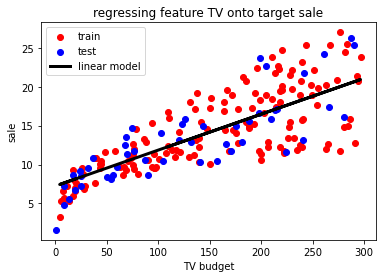

In [47]:
plt.figure()
plt.title('regressing feature TV onto target sale')

plt.scatter(X_train.ravel(), y_train, color='r', label='train')
plt.scatter(X_test.ravel(), y_test, color='b', label='test')
plt.plot(X_train.ravel(), y_train_pred, color='k', linewidth=3, label='linear model')

plt.xlabel('TV budget')
plt.ylabel('sale')
plt.legend()
plt.show()

The black line linear-regression model is estimated/fitted based on the train data set. Then, it will be used to predict the y-values of test data set.

In [48]:
# see parameters of the fitted linear model:
w = regressor.coef_[0] #because we have only one variable
b = regressor.intercept_ 
print(f'w(slop): {w}, and b(y-intercept): {b}')

w(slop): 0.04614340753674499, and b(y-intercept): 7.248909283005855


**Discussion on accuracy:** <br>
It is important to note that the estimated parameters `w` and `b` are unbiased, i.e. if we fit a linear model onto different sets of training data, we can get the true value of `w`(`b`) by taking the expected values of `w`(`b`), achieved for different sets of training data. Therefore, a better notation might be $\hat{w}$ and $\hat{b}$ as they are the estimation of true values $w$ and $b$. However, we usually avoid using hat. If we get different sets of observations of a system and try to model it with linear regression, the expected value of  $w$ (and $b$) will get closer to the actual value.

Since the estimated value of a parameter (from one set of observation) has some deviation from the true value, we can calculate Standard Error (SE) of the parameter to show how accuracte the estimate is. Standard deviation (std) is for one set of observations while SE is the standard deviation of a statistical parameter for sets of observation. However, we are able to calculte SE even for one set of observation.

For more info, watch this video: [std-vs-SE](https://www.youtube.com/watch?v=A82brFpdr9g)

#### >>>SIDE NOTES<<<

Before moving forward, I think it would be nice to review some concepts (we may face them in the future though. However, I think it is important  to better understand SE/confidene interval/...). You may want to watch the following videos (better to follow the order). However, if you can trust your knowledge, skip this part!

**Bootstrapping:** Watch [Bootstrapping main concept](https://www.youtube.com/watch?v=Xz0x-8-cgaQ) <br>
**Standard Error:** Watch [Standard Error](https://www.youtube.com/watch?v=XNgt7F6FqDU) <br>
**Confidence Interval:** Watch [Confidence Interval](https://www.youtube.com/watch?v=TqOeMYtOc1w&t=1s) <br>

Aslo, we may need to do a small review on p-value <br>
**Suggestion:** read [MIT note](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading17b.pdf)

Now, let us get back to where we left off. We were talking about the estimated values $\hat{w}$ and $\hat{b}$. Since they are an estimation of true values, it would be interesting to test if there really is association. So, we want to test the following null hypothosesis: There  is no association with Y and X. So, we can repeat the experimnent with new sets of data (or do bootstrapping) and find different values for the estimation of $w$ and $b$. Let us do that for the data we have:

In [49]:
#let us focus on X_train:
from sklearn import utils

n_bootstrap = 1000

w_vec = np.zeros(n_bootstrap)
b_vec = np.zeros(n_bootstrap)

data_train = np.c_[X_train, y_train]
for i in range(n_bootstrap):
    data_bootstrap = utils.resample(data_train, random_state=i)
    regressor = LinearRegression().fit(data_bootstrap[:,0].reshape(-1,1), data_bootstrap[:,1])
    
    w_vec[i] = regressor.coef_[0]
    b_vec[i] = regressor.intercept_

In [50]:
#now, let us plot the distribution of `w` (you can do `b` on your own!)
w_mu = np.mean(w_vec)
w_std = np.std(w_vec)

w_SE = w_std #note that Standard Error of w is basically the standard deviation of different values we got for w   
print('Standard Error: ', w_SE)

Standard Error:  0.003279658392741697


For linear regression, we already have a formula that can give us the w_SE (see book page 66):

In [51]:
#Residual Sum of Squares (RSS)
y_diff = y_train - y_train_pred
RSS = np.sum(np.square(y_diff))

#Residual Standard Error(RSE)
RSE = np.sqrt(RSS/(X_train.shape[0]-2))

#X_dev = sum((X-Xavg)^2)
X_dev = np.sum(np.square(X_train - np.mean(X_train)))

w_SE_formula = np.sqrt((RSE**2)/X_dev)
print('w_SE using formula of book: ', w_SE_formula)

w_SE using formula of book:  0.003249284898592108


As observed, the value of SE of $w$ calculated by bootstrapping is close to what provided by the formula. We can also plot the distribution of $w$ based on the values collected throughout the bootstrapping process. And, we can get approx. 95\% confidence interval, by using the interval (mu-2*std,mu+2*std)

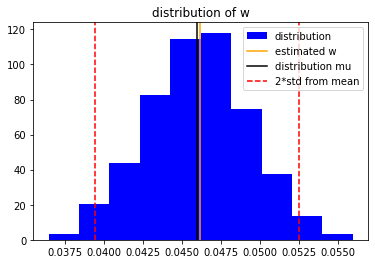

In [52]:
plt.figure()
plt.title('distribution of w')

plt.hist(w_vec,color='b',label='distribution', density=True)
plt.axvline(w,color='orange',label='estimated w')
plt.axvline(w_mu,color='k',label='distribution mu')
plt.axvline(w_mu-2*w_std,color='r',linestyle='--',label='2*std from mean')
plt.axvline(w_mu+2*w_std,color='r',linestyle='--')

plt.legend()
plt.show()

Also, you may want to dig more into "linear regression" topic by calculating how strong is such linear association. IF there is no association, we expect to see w=0. Right? But, we cannot just use the value of $w$, because its magnitude can be easily changed by scaling data. So, we should take into account its standad deviation. But, how to test whether the w is significantly far from zero? In other words, does the result provide a significant evidence that there is an association. 

Here is where we should use the hypothesis testing. Our null hypothesis is as follows: There is no association between x and y, i.e. slope $w=0$. We have samples, and with samples, we can just estimate our parameter w ($\hat{w}$). (note that when we calculate $w$, we assume we are calculating $w$ in y=wx+b) We would like to see $\hat{w}$ to be close to true value $w=0$ IF NULL HYPOTHESIS IS TRUE. Now, we observed $\hat{w}$ to be around 0.05. Is it significantly far from 0? Well, with null hypothesis $w=0$ and the standard deviation SE (obtained by having in mind $y=wx+b$. SE in both alternative and null hypothesis are the same in linea regression), we  can normalize the observed value and caluclate t-score as follows:

In [53]:
t = (w - 0)/w_SE
print('t is: ', t) 

t is:  14.069577380030264


Now, if we use t-distribution table (with degree-of-freedom = function (n_samples)), we will see that the p-value is very small (almost zeros). Now, we know that we can reject our null hypothesis (i.e. there is an association between X and Y). Now, the question is: "How strong/accurate is the proposed (i.e. linear) model?" In other words, we know we should reject the non-association hypothesis. But, can we trust our LINEAR model (i.e is that a good fit)?

In [54]:
regressor = LinearRegression().fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('r2 score on training set: ', r2_score(y_train, y_train_pred))
print('r2 score on training set: ', r2_score(y_test, y_test_pred))

r2 score on training set:  0.5767451599400782
r2 score on training set:  0.6902574858002379


we can see that the r2_score (normalized deviation from true y) is low for this model. (a good r2_score is close to 1, see below for more detail)  

$r2\_score = 1 - \frac{RSS}{TSS}$, where: 

$RSS = \sum\limits_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2}$, and $TSS = \sum\limits_{i=1}^{n}(y_{i} - \bar{y})^{2}$

We can think of RSS as amount of variation left unexplained after using the model. (note that, initially (before modeling), the variation in Y was TSS). r2_score is between 0(?) and 1, and the closer to one, the better.

Another metric is $RSE = \sqrt{\frac{RSS}{n-2}}$, however, $RSE$ can change when we re-scale data. So, we should better normalize this by dividing $RSS$ by $\bar{y}$. There is also F-statistics (it will be covered later)

# Multi-variate (Multiple) Linear Regression

Now that we leanred about the concepts of linear regression, we should see how we can extend it to consider more than one variable. Why not providing simple (univariate) linear regression for  each variable? Because, we cannot know how to estimate the target sale given all three variables together. Also, we are ignoring two variables when using only one variable for predicing sale. We'll see that such consideration can result in misleading result if there is a correlation between two/more (input) variables.

$y \approx \hat{y}  = w_{1}x_{1} + w_{2}x_{2} + ... + w_{p}x_{p} + b  = W^{T}X + b$ 

As stated earlier, we should avoid using (seperate,) several simple linear regression (one simple linear regression for each individual predictor).

**practice:** try to find the advertisement data with simple linear regression, and then with multiple linear regression, 
and discuss the results. Are the coefficienet of simple-vs-mutliple close for each predictor? If not, why? what does that mean? (Hint: you can plot the correlation matrix that shows the correlation between predictors)

**Let us first implement a multi-linear regression:**

In [55]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

regressor = LinearRegression().fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [56]:
#check out coefficients...
print('the y intercept is: ', regressor.intercept_)
print('the coefficients correspond to three features are: ', regressor.coef_)

the y intercept is:  2.89257005115115
the coefficients correspond to three features are:  [0.04416235 0.19900368 0.00116268]


please note that our results are slightly different than what presented in the book because: (1) the authors may used the whole data; however, we here only used the train data set, and/or (2) even if the authors use train set, they might got other samples in their train set that is different to the one obtained by the function `train_test_split`.

now, how can I determine the importance of each feature? Note that the scale of coefficients depends on the scale of values per feature. So, better to standardize them!

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

regressor = LinearRegression().fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('the y intercept is: ', regressor.intercept_)
print('the coefficients correspond to three features are: ', regressor.coef_)

the y intercept is:  14.351333333333333
the coefficients correspond to three features are:  [3.72650688 2.94496827 0.02370631]


In [58]:
#let us calculate the  r2_score:
print('r2 score on training set: ', r2_score(y_train, y_train_pred))
print('r2 score on training set: ', r2_score(y_test, y_test_pred))

r2 score on training set:  0.9072183330817297
r2 score on training set:  0.8576396745320893


This is an interesting result. It shows the model with three predictors can be LINEAR! (We saw before that considering a single predictor cannot result in a good LINEAR model)

The results above indicate that there is a considerable relationship between the first two features and the target value. However, the coefficient for the last feature is almost zero, which suggest the last feature (i.e. Newspaper) has no significant impact on the target. 

It might be a good idea to evaluate p-value for each coefficient by calculate its t-statisitcs. That can give us some idea on how far/close we are to the NULL HYPOTHESIS VALUE of `coef = 0`. Also, it 

**NOTE:** Please note that bootstrapping on multiple linear regression is complicated. Also, calculating the SE of each coefficient requires you to be familiar with linear algebra. To avoid it (as we want to stay close to the scope of this series of tutorials), we use a python package to that for us (sklearn linear regression does not provide p-value)

In [59]:
import statsmodels.api as sm

# here a constant column should be added as new feature, which will act as the y-intercept! 
# This is how statsmodels works!
X_train_sm = sm.add_constant(X_train)

regressor = sm.OLS(y_train, X_train_sm)
regressor = regressor.fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     475.9
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           3.89e-75
Time:                        20:11:23   Log-Likelihood:                -279.71
No. Observations:                 150   AIC:                             567.4
Df Residuals:                     146   BIC:                             579.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3513      0.129    111.038      0.0

**Now, we can see the p-value of third feature is very large. It indicates that the NULL HYPOTHSIS of "there is relationship between x3 (i.e. newspaper) and y (i.e. sales)" cannot be rejected! So, maybe there is no relationship. Let us see if removing that can enhance the r2_score:**

In [60]:
# get X and y
X = df.iloc[:,:-2].to_numpy() #excluding newspaper!
y = df.iloc[:,-1].to_numpy()

# train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# scaling data (so the slopes not be impacted by the scale of data) [Optional!]
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# fit liner model to data
regressor = LinearRegression().fit(X_train, y_train)

# pred y of train & test using both train and test sets
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# get the coef & intercept of fitted linear model
print('the y intercept is: ', regressor.intercept_)
print('the coefficients correspond to three features are: ', regressor.coef_)
print('-----')

# calculate the  r2_score:
print('r2 score on training set: ', r2_score(y_train, y_train_pred))
print('r2 score on test set: ', r2_score(y_test, y_test_pred))

the y intercept is:  14.351333333333333
the coefficients correspond to three features are:  [3.72945528 2.95186219]
-----
r2 score on training set:  0.9071991785449653
r2 score on test set:  0.8580883042722334


We may notice some small changes. The correct approach is to do it on different sets of test set (e.g. using cross-validation- will be discussed later!) and get the average & std of r2_score. For now, it seems the r2_score is slightly decreased! It is important to note that increasing number of predictors increase $r2\_score$ anyway (However, we can see here the change is really small which indicates that the added predictor is not significant! Its inclusion may result in worse performance of model on test set). Since R2 changes, we cannot usually compare two models of same type and of same data that uses different number of predictors. So, we should use `adjusted r2\_score`. What is it? Google / read sklearn docs.

But, why do we get a not-close-to-zero slope for newspaper when it is being used alone as the single predictor in simple (univariate) linear regression? (in that case, we also get low p-value, which means there exist a relationship between y and newspaper. So, what is going on? (**NOTE:** please note that we haven't shown the results of single-predictor newspaper. You are encourage to do it!)

Answer: <br>
The reason is that there is correlation between newspaper and probably another predictor. So, when we increase newspaper by $\Delta$ amount, we are increasing the other (hidden) factor by (a fraction of) $\Delta$ as well. (Why hidden? because we said that we are using single-predictor "newspaper". So, the other variable cannot be seen. But, it can have impact on the input when we change some other factor!!
(E.g. You can change the weather from winter to summer. This changes the number of people go to beach! and that increases the sale of a person who sells ice cream! So, the actual relationship is between the salesman and the number of peoples in the beach.)

In [61]:
# let us take a look at correlation
X = df.iloc[:,:-1] # X is dataframe
print(X.corr())

                 TV     Radio  Newspaper
TV         1.000000  0.054809   0.056648
Radio      0.054809  1.000000   0.354104
Newspaper  0.056648  0.354104   1.000000


Now, we can see the correlation between Radio and Newspaper is not bad! It is actually ~0.35. So, Even if we predict sale with newspaper, a change in newspaper is correlated with change in Radio (so the value of radio changes and so the value of target, i.e. sales!). Therefere we might believe that there is an actual relationship between y and the newspaper. However, we know that is not true (as we saw before when we used all of them for predicting target)

**NOTE:**<br>
Although p-value is an interesting topic, it might be difficult to calculate it and then make a decision about whether keep or remove a particular predictor. Alternatively, we can do `feature-selection`. It is a process that helps us choose better predictors. Feel free to dig into the sklearn and find different ways to select features... (see API: [feature_selection](https://scikit-learn.org/stable/modules/feature_selection.html#)).

In [62]:
#example (think about it and read the document if you are not familiar with something!)
from sklearn.feature_selection import mutual_info_regression
mutual_info_regression(X, y)

array([0.67383545, 0.47087372, 0.        ])

**some interesting questions:**
* Is at least one of predictors useful for predicting the response? --> use F-statistics: come back later!
* If yes, then which subset of  predictors help to explain Y? Is it all of them? --> Forward/Backward/mix selection
* Goodness-of-fit score?
* Given a new test point X, what/how to predict its response (corresponding target y value), and how accurate is that?

**> Q1: Is at least one of predictors useful for predicting the response?**

Similar to p-value calculated for each predictor in multi-variate linear regression, we can calculate a single F-statistic value as follows:

$F-statistics = {\frac{p}{n-p-1}}{\frac{TSS - RSS}{RSS}}$

(note that: $R^{2} = \frac{TSS - RSS}{TSS}$, so do not get confused!)

Recall that:<br>
$TSS = {\sum\limits_{i=1}^{n}(y_{i} - \bar{y})^{2}}$, and $RSS = {\sum\limits_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2}}$.

In [63]:
#let us calculate F-statistics
def f_statistics(y_true, y_pred, p):
    """
    This function calculates the F-statistics of a fitted linear regression model.
    
    Parameters
    ----------
    y_true: ground truth values of target y
    y_pred: predicted values of target y (using fitted linear regression model)
    
    output
    ---------
    f_statistics_value: scalar
    shows the value of F-statistics.
    """
    RSS_by_TSS = 1 - r2_score(y_true, y_train_pred)
    
    n = len(y_true)
    
    return ((n-p-1) / p) * (1/RSS_by_TSS - 1)

In [64]:
f_statistics_val  = f_statistics(y_train, y_train_pred, p = 3)
print('f_statistics value is: ', f_statistics_val)

f_statistics value is:  475.7539785778091


So, what does this value tell us?

F-statistics is a measure that helps us to reject OR not reject the NULL HYPOTHESIS: "there is no relationship between y and any other features" (H alternative is: "there is at least one feature that is related to target y")

If f-statistics is close to one, that means we canNOT reject null hypothesis (i.e. there might be no relationship between y and features). However, if it gets greater than one, we should reject null hypothsis. How much greater? Well, if the number of samples are many, a F-statistics that are higher than 1 should be enough for rejecting null hypothesis. However, if n_samples is small, we should get a very large value for f-statisitcs.

Why are we comparing f-statistics with one? Well, for that you need to go deeper, and I recommend you go through this part and understand its formula for linear regression as it can help you understand the reason behind "one".

**Should I do hypothesis testing everytime?** Well, in my experience (whether practicing on my own or reading blogs), I realized you can simply try different preprocessing (feature selection / feature engineering) and build ML model in an iterative  process to get better models. Therefore, I think null hypothesis may be too much details for Machine Learing, particularly when things get heavy, how can one apply these methods? I believe you should have a very good grasp on such concept to be able to apply it in different (more difficult/complicated) context. Therefore, I decide to stop discussing this matter further. I will do the same in other chapters. (I might discuss things if I feel something is really important or necessary. That is just my personal view and you should all feel free to have your opinion or get into further details if you feel so.

**> which subset of predictors help to explain Y?** <br>
This is variable selection (a.k.a feature selection / feature extraction). The goal is to find a subset of predictors that are associated with response variable and dump the unncessary features.Three classicial approaches are: F-selection, B-selection, and mixed-selection. To reject/choose a feature is based on p-value. (Or is it? please go through the sklearn document and see if the selection procedure is based on p-value/r2_score/or any other score that can be defined by user.

**> Goodness-of-fit score?** <br>
Two of most common goodness-of-fit measures are: $R^{2}$, and $RSE$. Below, we review their formula: <br>

$y \approx \hat{y}=wx + b $

$r2\_score = 1 - \frac{RSS}{TSS}$, with  $RSS = \sum\limits_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2}$, and $TSS = \sum\limits_{i=1}^{n}(y_{i} - \bar{y})^{2}$; (**side note:** $MSE  = \frac{RSS}{n}$)


$RSE = \sqrt{\frac{RSS}{n-2}}$. Note that this is for univariate linear regression. For multi-variate linear regression (with $p>1$ predictors), the formula is as follows:

$RSE = \sqrt{\frac{RSS}{n-p-1}}$, why n-p-1? (well, you should go deeper in statisitics. It can be shown that RSS has the following distribution: <br>

$RSS:  {\sigma^{2}}.{ChiSq(dof = n-p-1)}$, where  \sigma is the unexplained (inevitable/irreducible) part of error.

It can be shown that $E(RSS)=\sigma^{2}(n−p-1)$. That means the RSS gets bigger by increasing the number of samples. To get an unbiased estimator, we can define $err = \frac{RSS}{n-p-1}$ to make sure the expected error is independent of size of samples. 

**NOTE:** If $r2\_score$ is close to 1, that means the model explains a large portion of the variance in the response variable (because high value of $r2\_score$ means lower $RSS$, which basically means the `predicted y` is close to `true y`. In other words, the variance in response value is explained more by the model when `r2_score` is higher.

In [65]:
#now let us plot the regression with two predictors "TV" and "Radio"

#STEP1: Fitting model to train data
# get X and y
X = df.iloc[:,:-2].to_numpy() #excluding newspaper!
y = df.iloc[:,-1].to_numpy()

# train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# scaling data (so the slopes not be impacted by the scale of data) [Optional!]
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# fit liner model to data
regressor = LinearRegression().fit(X_train, y_train)

# pred y of train & test using both train and test sets
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

y_test_pred

array([10.05850143,  7.43463468,  6.9661994 , 24.15243914, 11.98916444,
        6.53178763, 13.04950021, 14.97882008, 10.96419972, 16.29194785,
       22.97702398,  9.11866768, 10.35083976, 15.41998146, 11.61343299,
       12.13304052, 18.63911396, 10.84085527, 16.06625596, 17.24957539,
       24.1992535 ,  9.4907953 , 15.13793325, 12.40194589,  5.67441768,
       15.25325562, 12.22468988, 20.96744356, 13.28984304,  9.1466426 ,
       13.20808468, 21.55555909, 18.08972886, 21.17325034,  6.66589347,
        6.15099434,  7.93871645, 13.05606428, 14.81041234,  6.21002077,
       12.24132755,  9.21008876, 15.0711734 , 16.28374757, 17.13850043,
       13.3542833 ,  3.70990642, 12.3746764 , 15.82694849,  8.67093635])

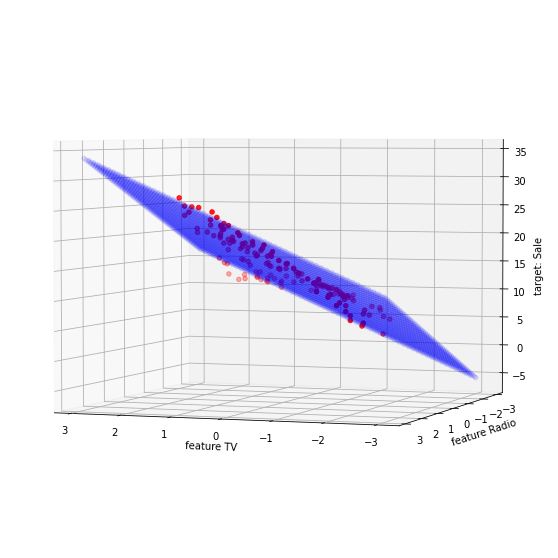

In [66]:
#STEP2: Plotting the  3d graph and hyperplane
min_feature, max_feature = -3, 3

feature_0, feature_1 = np.meshgrid(np.arange(min_feature,max_feature,0.1),
                                   np.arange(min_feature,max_feature,0.1))

X_mesh = np.c_[feature_0.ravel(), feature_1.ravel()]
y_mesh = regressor.predict(X_mesh)

fig = plt.figure(figsize=(30,10))
#plot the fitted hyperplane that contains point (x,y,z) 
#... where the z is the prediction of response variable for predictors x,y
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_mesh[:,0],X_mesh[:,1],y_mesh, c='b', alpha=0.1)
ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r')

ax.set_xlabel('feature TV')
ax.set_ylabel('feature Radio')
ax.set_zlabel('target: Sale')
    
ax.view_init(elev=3, azim=110)
plt.show()

We can see that some of the points are above it and some others below it.

**> Three types of errors associated with (mutiple) linear regression:**<br>
* The paramters W and b are just estimation of true W and b. We can use the concept of confidence interval to show how close $\hat{Y}$ is to $Y$ (different estimation of parameters-e.g. via bootstrapping- leads to different parameters...and thus different $\hat{Y}$ on the test set.

* Bias Error: Because we assumed that the model is linear (which is usually not the reality!). So, our model has some bias error. For now, we ignore this and we think our model is true.

* Even if we have true estimator, our prediction still has the  irreducible error(with distribution $N(0, \sigma)$. We use Prediction Interval to show how close $\hat{Y}$ is to $Y$. For instance, let's say I want to focus on a subsample of data and fit a linear model onto it. I can say my model is closer to the actual model for this subsample. However, since n of samplesa are smaller, we are dealing with higher uncertainty, and there for prediction interval becomes longer/

**Get deeper: Confidence Interval vs Prediction Interval** <br>
Later :)

**Some extra consideration:** 
<br>
(1) Qualitative Predictors: fancy word for categorical features :).. sometimes the  predictors are not numerical, so we should transform (encode) the categorical features into numerical ones. 
<br>

(2) Some times the qualitative predicor contains two group only: (e.g. it is day or night).. in this case we can create a dummy variable and show  the labels day/night with the help of binary value 0/1. In machine learning, we call it one-hot-encoding which can be used for  a categorical feature with more than two labels as well)
(**note:** We may want to take a look at the p-value of the dummy variable. If it is big, it means it doesn't affect $Y$ significantly. We should be able to see such fact with help of $r2\_score$ as well.)
<br>

**Note:** <br>
As depcited in the figure above, when both features have high values, the model underestimate the target value. That can mean that the two features have some synergy that in practice, they boost each other.

To model this, we define a new variable `X = TV * Radio` and add it to the previous ones (better to keep both `TV` and `Radio`as well). Let us see the result:

In [67]:
# get X and y
X = df.iloc[:,:-2].to_numpy() #excluding newspaper!
y = df.iloc[:,-1].to_numpy()

X = np.c_[X, X[:,0]*X[:,1]] #add TV * radio

# train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# scaling data (so the slopes not be impacted by the scale of data) [Optional!]
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# fit liner model to data
regressor = LinearRegression().fit(X_train, y_train)

# pred y of train & test using both train and test sets
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# get the coef & intercept of fitted linear model
print('the y intercept is: ', regressor.intercept_)
print('the coefficients correspond to three features are: ', regressor.coef_)
print('-----')

# calculate the  r2_score:
print('r2 score on training set: ', r2_score(y_train, y_train_pred))
print('r2 score on test set: ', r2_score(y_test, y_test_pred))

the y intercept is:  14.351333333333335
the coefficients correspond to three features are:  [1.57858188 0.49099955 3.60921627]
-----
r2 score on training set:  0.9739792008933047
r2 score on test set:  0.9481495211786501


What we did can be considered as feature engineering. We tried to engineer a feature to help model!

**TIP:** Think about the problem and results and get some insight can result to a good feature engineering! We can even combine a categorical and numerical features. For instance, if X1 is categorical (with tags 0 an 1) and X2 is numerical, and the impact of X2 on response might be different for different tags of X1, we can create an additional feature $X3 = X2 \times X1$.

**#practice:**<br>
credit data, predicting balance using income and student features

**TIP:** If data shows non-linear relationship, we can use the concept of "polynomial feature", so, in addition to X1, we may consider $X1^{2}$, $X1^{3}$, and so on. (However, we may overfit the data at some point and we should be careful about it.)

**Potential problems when using linear regression:** <br>
(1) Non-linearity of response-predictor relationship... let us see it with an example 

In [68]:
df = pd.read_csv("./datasets/Auto_2.csv") #there two auto data sets. We are using auto_2.
df.head(3)

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


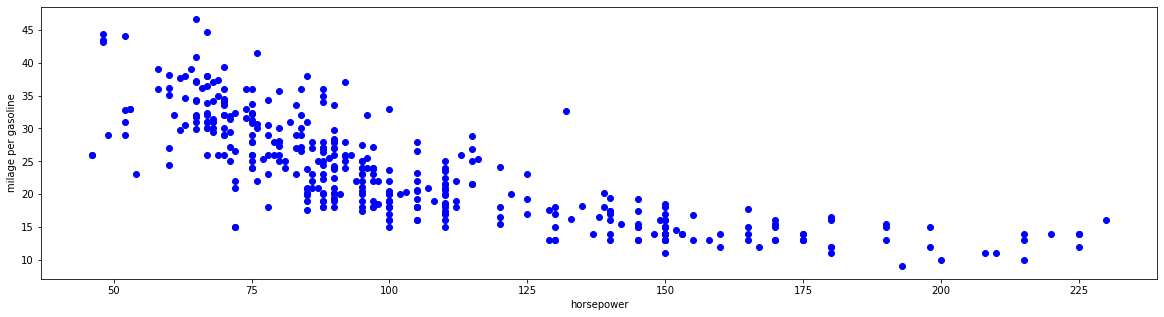

In [69]:
#let use consider horsepower as feature and mpg as response
X = df['horsepower'].to_numpy()
y = df['mpg'].to_numpy()

#let us take a quick look at the graph
plt.figure(figsize=(20,5))
plt.scatter(X, y, color='b')
plt.xlabel('horsepower')
plt.ylabel('milage per gasoline')
plt.show()

In [70]:
#we can see the relationship is not linear exactly, so what if we use polynomical feature?
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit(X.reshape(-1,1))

X_poly = poly.transform(X.reshape(-1,1))

X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y)

In [71]:
regressor_poly = LinearRegression().fit(X_poly_train, y_train)
y_train_pred_poly  = regressor_poly.predict(X_poly_train)
y_test_pred_poly  = regressor_poly.predict(X_poly_test)

print('r2 score with poly feature: ', r2_score(y_train, y_train_pred_poly))
print('r2 score with poly feature: ', r2_score(y_test, y_test_pred_poly))

r2 score with poly feature:  0.6931299744458256
r2 score with poly feature:  0.6536014625161689


In [72]:
regressor = LinearRegression().fit(X_poly_train[:,:2], y_train) #excluding degree2 (just simple linear regression)
y_train_pred  = regressor.predict(X_poly_train[:,:2])
y_test_pred  = regressor.predict(X_poly_test[:,:2])

print('r2 score with poly feature: ', r2_score(y_train, y_train_pred))
print('r2 score with poly feature: ', r2_score(y_test, y_test_pred))

r2 score with poly feature:  0.6023258126651525
r2 score with poly feature:  0.6000253194680438


ValueError: x and y must have same first dimension, but have shapes (3600, 2) and (7200,)

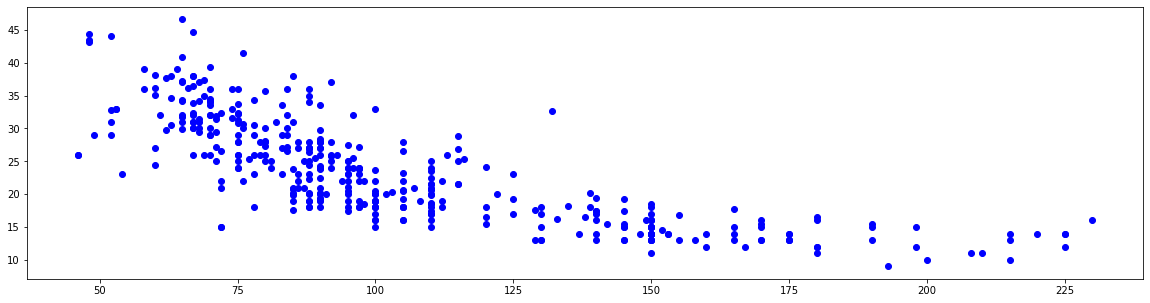

In [73]:
#let us plot both of them:
X_mesh_poly = PolynomialFeatures().fit_transform(X_mesh.reshape(-1,1))

plt.figure(figsize=(20,5))
plt.scatter(X, y, color='b')

plt.plot(X_mesh, regressor.predict(X_mesh_poly[:,:2]), color='r', linewidth=3, label='simple feature')
plt.plot(X_mesh, regressor_poly.predict(X_mesh_poly), color='orange',  linewidth=3, label='poly feature (deg=2)')

plt.xlabel('horsepower')
plt.ylabel('milage per gasoline')

plt.legend()
plt.show()

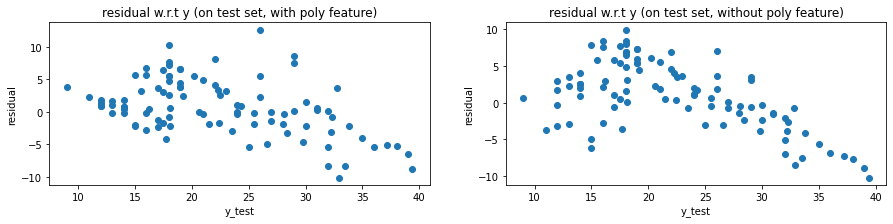

-----------------------------------------------------------------


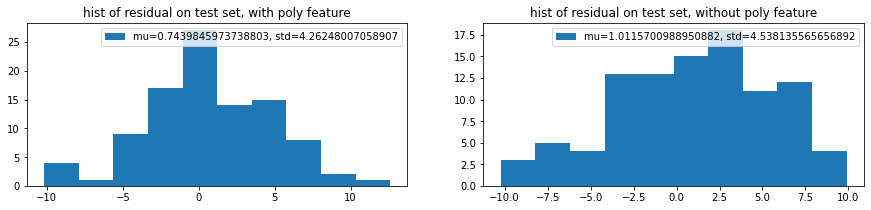

In [74]:
#let us see the residuals:
residual_ytest_poly = y_test_pred_poly - y_test
residual_ytest = y_test_pred - y_test

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,3))
axs[0].scatter(y_test, residual_ytest_poly)
axs[1].scatter(y_test, residual_ytest)

axs[0].set_title('residual w.r.t y (on test set, with poly feature)')
axs[1].set_title('residual w.r.t y (on test set, without poly feature)')


axs[0].set_xlabel('y_test')
axs[1].set_xlabel('y_test')

axs[0].set_ylabel('residual')
axs[1].set_ylabel('residual')
plt.show()

print('-----------------------------------------------------------------')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,3))
axs[0].hist(residual_ytest_poly, label=f'mu={np.mean(residual_ytest_poly)}, std={np.std(residual_ytest_poly)}')
axs[1].hist(residual_ytest, label=f'mu={np.mean(residual_ytest)}, std={np.std(residual_ytest)}')

axs[0].set_title('hist of residual on test set, with poly feature')
axs[1].set_title('hist of residual on test set, without poly feature')

axs[0].legend()
axs[1].legend()
plt.show()



In [75]:
#but to measure how close these two plots are to normal distribution, we can plot QQ-plot:


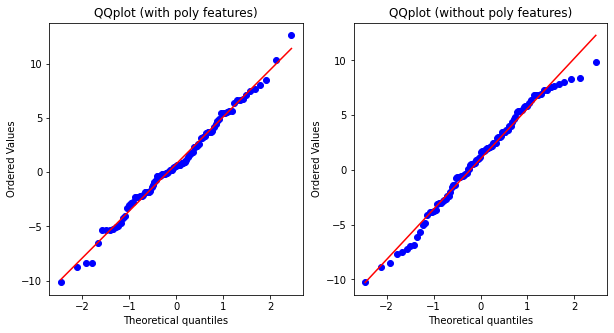

In [76]:
from scipy import stats
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
stats.probplot(residual_ytest_poly, plot=axs[0])
stats.probplot(residual_ytest, plot=axs[1])

axs[0].set_title('QQplot (with poly features)')
axs[1].set_title('QQplot (without poly features)')
plt.show()

It is hard to judge which one is closer to normal distribution...

(2) Correlation of Error Terms

We are assuming that the errors `residual` are uncorrelated. However, if there is a correlation, our sense of confidence interval is not correct. In time series, such assumption is often not met. In other words, the residual error at `t+1` has positive correlation to the one at `t`. We can even see such correlation in the histogram above (right figure). For y-test beyond 20, we can see there is a clear trend in the residual values. (Solution?)

(3) non-constant varianc of error terms (a.k.a heteroscedasticity): when the error is wider at some response values. For instance, if variance of errors get larger at highr value of y, one solution might be using `log()` or `\sqrt(x)` functions to shrink larger valus of y. 

(4) one/more(a few) outliers (**here, we mean the point with high response value**) may not have that much effect on the slope/y-intercept of the linear model. However, it can drastically change the value of RSE/ r2_score. Therefore, it might be a good idea to remove outliers to get better sense on the performance of the model as the valus of RSE / r2_score can be more "true"!!! How to detect them? one way is to plot studentized residuals which is: $\frac{e_{i} - 0}{SE_{e}}$. In other words, we want to know how far $e_{i}$ is from distribtution with average of 0 and normal distribution of SE_{e}, which is standard deviation of e. If it goes beyond +/- 3, then the point can be considered as an outlier. (Note: the standard error of residual is in fact RSE(?) ). It is important to note that the outlier might be detected just because our model was not good enough to capture it. So, be careful.

(5) High Leveraging points: these are the points with extreme values in features. These can highly impact the (fitted) model and therefore it is important to detect and handle them. How to detect it? It is important to note that searching outlier in each individual dimension is meaningless as we should consider all points together (see Fig 3.13). So, we may have a point where its value of X1 feature and X2 feature is usual, but together, in 2d-space, they may be far from others. So, one way is to calculate pair-wise distances and choose the one that has the largest distance to its NN. or, we may (somehow) find the values of k (number of clusters) and then remove a group of data points. Another way is to calculate a statistical value (see 3.37). 

(6) Colinearity

In [77]:
#let us see it with an example:
df = pd.read_csv("./datasets/Credit.csv", index_col=0)
df.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


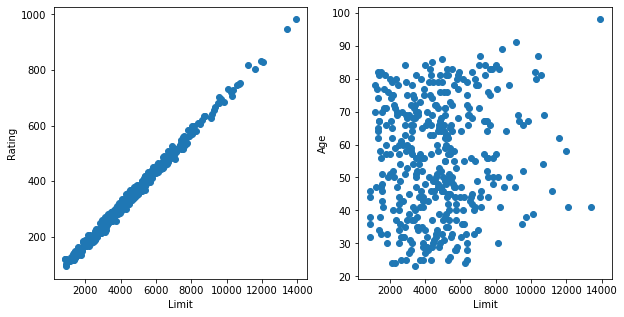

In [78]:
# now, let us see X_limit-vs-X_rating, and X_limit-vs-X_age:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].scatter(df['Limit'], df['Rating'])
axs[1].scatter(df['Limit'], df['Age'])

axs[0].set_xlabel('Limit')
axs[1].set_xlabel('Limit')

axs[0].set_ylabel('Rating')
axs[1].set_ylabel('Age')

plt.show()

We can see a clear linear relationship between Limit and Rating (they are colinear).Since both of them tends to increase/decrease together, their impact on response is not easily seperable. Therefore, their uncertainty (in estimation of linear model parameters) increases. Therefore, we should better detect and remove colinear feature. <br>

* we may use correlation matrix.
* a better way (which works for multi-colinearity as well) is to measure VIF (variance inflation vector) as follows: <br>

$VIF = \frac{1}{1 - r2\_score(X_{j}|X_{-j})}$ <br>

$r2\_score(X_{j}|X_{-j})$ is the r2_score from a regression of $X_{j}$ onto $X_{-j}$ (all predictors other than $X_{j}$). So, if a particular predictor can be easily predicter by other predictors (i.e. high r2_score and thus high VIF), that means we do not need that particular predictor as it can be obtained from others! (rule of thumb: if VIF exceeds 5 or 10, indicates a high level of colinearity) <br>

Solution: Drop one of variable with high VIF, OR combine them (e.g. standardize and take their avg? but what if their correlation is negative, their summation may become zero. No??)

**Linear Regression-vs-KNN**<br>
If relationship is linear, linear regression is better (and even better than KNN with large k). However, if the relationship between x and y becomes non-linear, then KNN (with lower k) can perform better. **HOWEVER,** one should note that this is not always the case! In fact, in high dimension, when the relationship between x and y is non-linear, KNN usually perform worse! So, in short, parametric models (like linear regression) outperforms non-parametric ones when the number of samples is low and the dimension is high!

## Summary [on (linear) regression]

* **Quesetions to ask about our data:** Let us assume we have a data where `predictors X` are TV ad budget / radio ad budget/ newspaper ad budget, and the `response variable y` is sale. What kind of questions can we ask here? Below are some examples:
    * Is there relationship between X and y? If yes, how much is that relationship strong?
    * What predictor(s) are associate with y and how much?
    * Is relationship between X and y linear? If yes, then do linear regression. If not, can we transform data such that the linear regression model becomes applicable?
    * Is there any interaction (synergy) between predictors? (i.e. two predictors may have some impat together different their simple summation)
    

* **Linear model:** $y = w^{T}X + b + \epsilon$ --> and we want to estimate it... so: $\hat{y} = \hat{w}^{T}X + \hat{b}$


* **Side Note: see summary of data:** df.describe()


* **What are the optimal values for $\hat{w}$ and $\hat{b}$?** optimal values of $\hat{w}$ and $\hat{b}$ should result it minimum MSE (on train set). <br> **Reminder:** our ultimate goal is to get low MSE on test set using the model fitted on train set.


* **MSE --> RSS (!)** Let us assume the number of samples in  train set is n. Then, we know that $MSE = \frac{1}{n}\sum\limits_{i=1}^{n}{(y_{i} - \hat{y}_{i})^{2}}$ (Note that $y_{i}$ is the true value of y for  i-th sample, and $\hat{y}_{i}$ is the predicted value for y of that sample.). Now, if we just focus on the sum (and not the average), we have RSS (Residual Sum of Squares) and that's it! --> so, we have: $RSS = \sum\limits_{i=1}^{n}{(y_{i} - \hat{y}_{i})^{2}}$ and the optimization problem is to minimize RSS over the train set samples (we can as well minimis MSE, there is no difference!)


* **Discussion on the estimated values $\hat{w}$ and $\hat{b}$:** Please note that the estimated values $\hat{w}$ and $\hat{b}$ are obtained based on the current train set. So, if we change the train set or splitted data into train/test in a different way, we may get different values for $\hat{w}$ and $\hat{b}$. All of these values are just estimation and no the true-but-unknown $w$ and $b$. **So, what can we do?** We can plot the distribution of each parameter and see how certain we are about our estimation. **But, how to get that distribution?** we can do bootstrapping on the given train set (e.g. create 1000 new train sets) and then find $\hat{w}$ and $\hat{b}$ for 1000 times. Now, we can create the histrogram of the obtained values. Let us focus on parameter $\hat{w}$ (same concept/discussion is true for $\hat{b}$.). The distribution shows the liklihood of getting different values for $\hat{w}$. The standard deviation of this distribution is `the standard deviation of the estimated value $\hat{w}$` and we call it Standard Error (SE) of $\hat{w}$. (For simple linear regression with one predictor, there is a closed-form formula that can be used to get the value of SE.) So, what? Well, now we can see how far we are from zero. If we are significantly far from 0, it means that y is related to the predictor X. So, we want to use SE to normalize our estimated value. Well, we are almost correct here, but not completely correct :) In fact, the real approach is to do null-hypothesis testing here!!! We assume there is no relationhip between y and X. So, $y = b + \epsilon$ (In other words, we assume $w=0$ and that is our null hypothesis). It can be shown that the SE of $\hat{w}$ in this case is the same as the one obtained by considering non-zero $w$ (explained earlier). Now, if $\hat{w}$ is close to 0, we can say "we cannot reject our null-hypothesis" (in other words, there might be really no relationship between X and y). Here is when p-value comes into the picture! We want to calculate the probability of getting the value of $\hat{w}$ or more extreme (i.e. higher magnitude whether positive or negative). So, we need to normalize $\hat{w}$ as follows: $t = \frac{\hat{w} - 0}{\hat{SE}_{\hat{w}}}$, and we want to use t-distribution with degree of freedom $n-1$ to find p-value. So, if p-value becomes small(less than a threshold, say 0.05), then we can reject our null hypothesis --> i.e. there is a relationship between y and x. (e.g. in a VERY extreme scenario, imagine p-value becomes almost zero, e.g. 0.00001). That means our t is at the end of tail VERY far from the center $\mu=0$. So, we cannot say it was just by chance from the distribution of  null-hypothesis.) --> please note that low p-value does not mean the  model should be linear. In other words, low p-value just says there is a relationship between y and x. Now, we should see if a "linear model" can be suitabe here or not!


* **Measuring goodness-of-fit of Regression:** As discussed before, we can just use MSE. However, MSE can get bigger when the values of y are larger and therefore, we need to way to normalize it. So, we use $r2\_score$ as follows: $r2\_score = 1 - \frac{RSS}{TSS}$, where RSS (TSS) is Residual (Total) Sum of squares: $RSS = \sum\limits_{i=1}^{n}{(y_{i} - \hat{y}_{i})^{2}}$ and $TSS = \sum\limits_{i=1}^{n}{(y_{i} - y_{avg})^{2}}$. The closer $r2\_score$ to one, the better! (we can see `r2_score` as the ratio of variance explained by the model)



* **Scaling data in Linear Regression** --> Although scaling data in linear regression does not change its accuracy, it can provide better insight on coefficients. If features X are not scaled to $\mu = 0$ and $\sigma = 1$, the coefficient of a feature can be impacted by the magnitude of its values. Therefore, it is more difficult to compare coefficient of features with each other. However, if we standardize each feature, the estimated value for the parameters correspond to features can be compared with each other!


* **F-statistics in Linear Regression** --> In multi-variate linear regression, we can get p-value for parameters, each correspond to a single feature. We can also calculate a single score called F-statistics score that can help us determine whether there is no relationship between X and y (null hypothesis), or not. To see the F-statistics and p-values of parameters, we can use **statsmodels** as follows:
```
import statsmodels.api as sm
#####
X_train_sm = sm.add_constant(X_train)
regressor = sm.OLS(y_train, X_train_sm) #OLS: Ordinary Least Squares
regressor = regressor.fit()
#####
print(regressor.summary())
```


* **Side Note: p-value and F-statistics:** please note that the p-value and F-statistics score can be calculated for parametric method. Also, getting low p-value cannot guarantee our model is good as we need to measure its goodness-of-fit. Calculating p-value and  F-statistics can help us to better undertstand some aspects of relationship between X and y. They are good if the goal is inference and understanding what is happening. Even in that case, one should find a package to find these values or use manual calcuation. Therefore, we may avoid using p-value and F-statistics for the rest of this summary in this chapter.



* **RSE:** We can get RSE as follows: $RSE = \sqrt{\frac{RSS}{n-p-1}}$, where $p$ is the number of features. `RSE` can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable.



* **Should I use all predictors?** --> no...because sometimes a predictor may have a very insignificant impact and can unnecessarily make the model difficult in terms of interpretability. Furthermore, it is possible that two highly-correlated features may cuase trouble in linear regression. Because, it is not clear which of those should have higher coefficient and how each contribute to the prediction of response variable. To select feature, we should do `feature-selection-process`. Three common types of feature selection are: (1) Forward-selection (2) Backward-selection, and (3) Mix-selection. We can use p-value as a measure to help us decide whether we should keep a feature or not (read more on this later! Also, take a look at scikit-learn)



* **Side Note: Confidence Interval-vs-Prediction Interval** --> Confidence Interval (CI) is related to the estimated values of parameter and it is a way to help us understand how close $\hat{f}(x)$ is to $f(x)$. However, we have irreducible error $\epsilon$. To measure how close our $\hat{y}=\hat{f}(x)$ to true $y = f(x) + \epsilon$, we use Prediciton Interval (PI). Therefore, PI is longer (see ... for further detail).


* **Interaction (synergy) between predictors** --> visualizing the fitted model and the data can be a good way to see how the model behave in different cases. For instance, in the `adversiting` data set, after using multi-linear-regression to model the data, we can see that the model underestimate y when the values of predictors `TV ad budget` and `radio ad budget` are both high. So, they have some interaction impact. We can create a new variable $X_{TV}.X_{radio}$. We can see that using this new feature in addition to the two features TV and radio, can greatly increase `r2_score`.



* **Final Notes:** At the end, I would like to cover some notes <br> (1) If data shows quadaratic behavior: use polynomial features (and then apply linea regression); We can plot the residual against the y value. We would like to see the residual values around around the horizontal line `residual=0`. We can also create QQplot with `scipy.stats.probplot(residual_values, plot=plt)`. This can gives us an idea on how much the resiudal values are close to normal distribution. <br>
(2) If there is correlation between $\epsilon$ values: Our assumption was that all errors are independent from each other. However, there might be correlation (i.e. $\epsilon(X)$ may give some information about the $\epsilon(X+1)$). In this case, we need some way to handle it. (feel free to search online, or wait and we may cover it later!) <br>
(3) heteroscedasticity (the variance of $\epsilon$ changes): If we notice the errors are getting wider around the horizontal line `residual=0`, that means the errors do not have consistent $\sigma$. We can use $log(..)$ or $\sqrt(..)$ transformation on y to resolve this issue. <br>
(4) Outlier -and- High Leveraging point: Here, when talk about outlier, we mean its y value is not in the usual range as others. Although this may not impact the parameters of the model, it can have a drastic impact on `r2_score` or other indices and therefore may mislead the user. `High Leveraging point` is when the features of an observation have suprising value. It is important to note that we should consider all features together to detect `High Leveraging point` (a.k.a outliers in feature space); because it is possible that each single feature has a normal-in-range value but the data point (i.e. considering all features of an observation together) might be far from others. This can have an impact on parameters of model and thus, it is important to handle them. But, how to find them? One way is to use pairwise-distances and find the point that is far from other. So we can find NearestNeighbor of each point and select the one that has the largest distance to its NN. Please note that the discovered point "might" be an outlier (because, for any set of samples, I can always find a point that has largest distance to its NN. But, that does not mean the point is `High Leveraging point`. Another way is to cluster data points (if possible) and then remove the a group that has largest distance to its closest group! (but what if that group is just a bunch of observations with some particular values for their features. If my group has 1000 members, should I consider them as `High Leveraging point` ??? <br>
(5) (multi) colinearity: is when two (or more) features are highly correlated with each other. Therefore, they can confuse the model as it is not create how much actual impact they each have on the prediction. A solution is to keep only one feature from a set of features that are highly correlated with each other. A better approach that checks multi colienarity as well is to calculate `VIF` score as follows: $VIF = \frac{1}{1 - r2\_score(X_{j}|X_{-j})}$, where $r2\_score(X_{j}|X_{-j})$ means the `r2_score` from regressing $X_{j}$ (considering the `j-th` feature as response variable) on $X_{-j}$ (all features excluding the `j-th` feature). Therefore, if we can get high VIF, that means the r2_score in the denominator is high, which means the $X_{j}$ can be predicted pretty well by other features. So, it provides redundant information. (rule of thumb: drop a feature if its VIF gets above 5 or 10.)




* **Final Note: Linear Regression-vs-KNN** --> If relationship is linear, linear regression is better (and even better than KNN with large k. Recall that larger k make KNN closer to linear model). However, if the relationship between x and y becomes non-linear, then KNN (with lower k) can perform better. **HOWEVER,** one should note that this is not always true! In fact, in high dimension, when the relationship between x and y is non-linear, KNN usually perform worse! So, in short, parametric models (like linear regression) outperforms non-parametric ones when the number of samples is low and the dimension is high!

## Lab 

In [111]:
#use boston data
df = pd.read_csv("./datasets/Boston.csv", index_col=0)
df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [112]:
#note that the data table shown in the book doesn't have black and we are going to drop it!
df = df.drop('black' ,axis='columns')
df.describe(include='all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'lstat'}>],
       [<AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

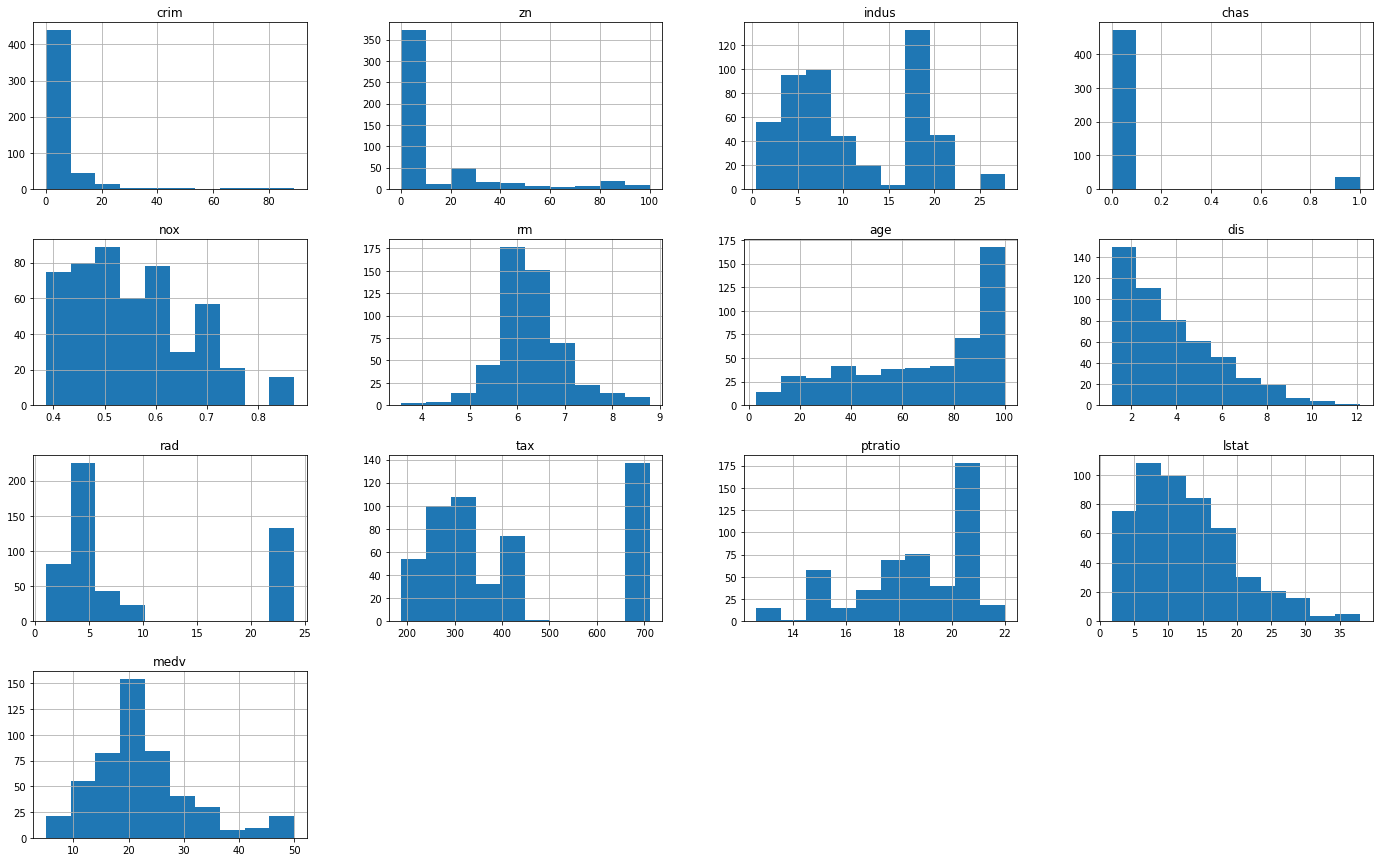

In [113]:
#now let us take a quick look at distributions:
df.hist(figsize=(24,15))

### simple linear regression

In [114]:
# we want to predict medv usig lstat.... #so let us seperate X and y:
X = df['lstat'].to_numpy()
y = df.iloc[:,-1].to_numpy()

X = X.reshape(-1,1) 

print('shape of X: ', X.shape)
print('shape of y: ', y.shape)

shape of X:  (506, 1)
shape of y:  (506,)


In [115]:
# now, let's use simple linear regression by regressing `medv` on `lstat`...
# if we want to get some statistical information, we should use  `statsmodels`

import statsmodels.api as sm
X_sm = sm.add_constant(X)
regressor = sm.OLS(y, X_sm) 
regressor = regressor.fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           5.08e-88
Time:                        21:57:46   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

**remarks:** <br>
(1) we can quickly see that  the p-value is (almost) 0. This suggest that there is a relationship between response variable and the predictor `lstat` (we can get the same conclusion by looking at the F-statistics score). Note that low `p-value` does not mean our model is good. If we look at the `R-squared`, we can see that the score is close to `0.5`, and this shows the linear model with single predictor cannot appropriately explain the variance in the target value. 

(2) we have Standard Error (SE) of parameters, and thus we can approximatly say the Confidence Interval (CI) is between $\mu - 2 \sigma$ and $\mu + 2\sigma$ (note that $\sigma$ is `SE`). So, for coeficient of x1, we can see the CI is `[-0.9500 - 2*0.039, -0.9500 + 2*0.039]`.

(3) How to find CI and PI for the response variable y ?!?

(4) let us plot x-y (see below)

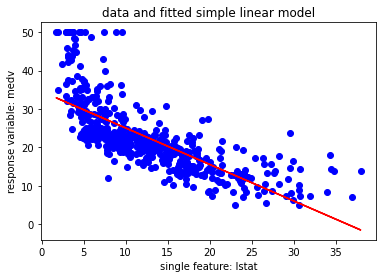

In [116]:
plt.scatter(X.ravel(), y, color = 'b')
plt.plot(X.ravel(), regressor.predict(X_sm), color = 'r')

plt.title('data and fitted simple linear model')
plt.xlabel('single feature: lstat')
plt.ylabel('response variable: medv')
plt.show()


side note: it can be seen that there is a quadratic behavior in the data... so, using polynomial features might help.

(5-I) let us plot residual-y

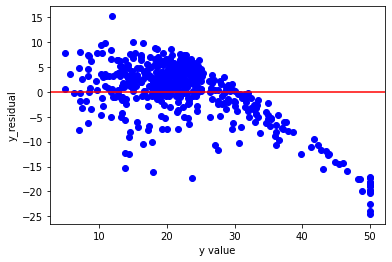

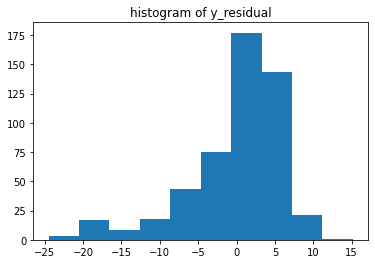

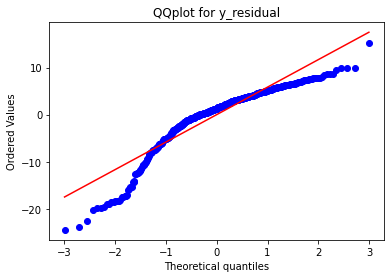

In [117]:
y_residual = regressor.predict(X_sm) - y

plt.scatter(y, y_residual, color='b')
plt.xlabel('y value')
plt.ylabel('y_residual')
plt.axhline(y=0, color='r')
plt.show()


plt.hist(y_residual)
plt.title('histogram of y_residual')
plt.show()

stats.probplot(y_residual, plot=plt)
plt.title('QQplot for y_residual')
plt.show()

we can see that the QQplot is deviated from straight line. Therefore, the residual values are not following a normal distribution. The scatter plot residual-vs-y shows that there is a correlation in highr values of y. In fact, we can see that residuals are following a trend for y>30.

(6-II) let us plot studentized residual-y (?!) --> LATER!

(7) Find outliers and high leverage point (How??) <br> 
Recall that outliers are in y-space and high leverage point is outlier in feature space.

In [118]:
#possible solution
from sklearn.metrics import pairwise_distances
D_y = pairwise_distances(y.reshape(-1,1))
np.fill_diagonal(D_y, np.inf) #Because of np.min(...) in next line
dist_to_nn = np.min(D_y, axis=1)
outlier_idx = np.argmax(dist_to_nn)
outlier_idx

180

In [119]:
#high leverage point:
D_x = pairwise_distances(X.reshape(-1,1))
np.fill_diagonal(D_x, np.inf) #Because of np.min(...) in next line
dist_to_nn = np.min(D_x, axis=1)
leverage_idx = np.argmax(dist_to_nn)
leverage_idx

387

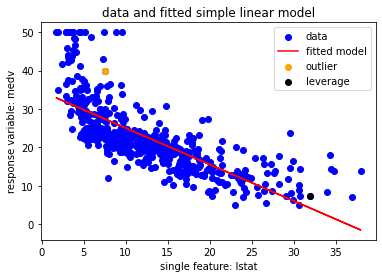

In [120]:
plt.scatter(X.ravel(), y, color = 'b', label='data')
plt.plot(X.ravel(), regressor.predict(X_sm), color = 'r', label='fitted model')

plt.scatter(X[outlier_idx], y[outlier_idx], color='orange', label='outlier')
plt.scatter(X[leverage_idx], y[leverage_idx], color='black', label='leverage')

plt.title('data and fitted simple linear model')
plt.xlabel('single feature: lstat')
plt.ylabel('response variable: medv')

plt.legend()
plt.show()

(8) Let us use all predictors

In [121]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

X_sm = sm.add_constant(X)

regressor = sm.OLS(y, X_sm) 
regressor = regressor.fit()

print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          2.23e-133
Time:                        21:57:54   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.0

**remarks:**
* F-statistics is large, which shows there is relationship between features and y
* p-value for x3 and x7 is large, which means there is little relationship between response variable y and these two features.
* How to know if there is (multi-) colinearity? let us calculate VIF as follows

In [203]:
def _get_VIF(X):
    """
    This parameters calculate VIF for features and return them
    
    Parameters
    ----------
    X: numpy.ndarray
        feature matrix of shape (n,p) where n is number of observations and p is number of features
    
    
    Returns
    ---------
    a vector of size p that contains the VIF of each feature 
    """
    if X.shape[1] <= 1:
        raise  ValueError ('the second dimension of X must be at least 2')
    
    p = X.shape[1]
    
    VIF_scores = np.full(p, -1, dtype=np.float64)
    
    for i in range(p):
        predictors = np.delete(X, i, axis=1)
        target = X[:,i].reshape(-1,1)
        
        regressor = LinearRegression().fit(predictors, target)
        r_squared_score = r2_score(target, regressor.predict(predictors))
        
        VIF_scores[i] = 1 / (1 - (r_squared_score**2 - 1e-6))
    
    return VIF_scores

In [124]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

VIF_scores = _get_VIF(X)
VIF_scores

array([1.76748592, 2.29845891, 3.98718063, 1.07116777, 4.36909262,
       1.91253244, 3.08823204, 3.95403664, 7.44530076, 9.00215766,
       1.79705959, 2.8707765 ])

**remarks:** <br>
VIF score is high for feature no. 8 and 9 (in numpy indexing). This shows that these two variables can be obtained from others. Although we see two features with high VIF, it is possible that one of them is highly affected by the other! In other words, removing both of them may cause loss of informtion. Let us take a look at correlation matrix:

In [126]:
df_X = pd.DataFrame(X)
corr = df_X.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993


The correlation matrix shows a high correlation (more than 0.9) between feature 8 and 9. Therefore, it is possible that removing feature 9 makes VIF scores of 8 lower. 

In addition, we will delete feature 2 and 6 (numpy indexing) as it has high p-value. Let us take a look at the model again:

In [128]:
X_clean_v1 = np.delete(X, [2, 6, 9], axis=1)

X_sm = sm.add_constant(X_clean_v1)
regressor = sm.OLS(y, X_sm) 
regressor = regressor.fit()

print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     146.9
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          8.23e-134
Time:                        22:20:36   Log-Likelihood:                -1511.5
No. Observations:                 506   AIC:                             3043.
Df Residuals:                     496   BIC:                             3085.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9841      4.945      8.085      0.0

In [129]:
#calculate VIF_scores again after cleaning X
VIF_scores = _get_VIF(X_clean_v1)
VIF_scores

array([1.76425722, 2.1540511 , 1.04918546, 3.53821529, 1.79323868,
       3.40711284, 2.70102654, 1.71583638, 2.52324615])

In [130]:
#now we can see that the accuracy is almost the same. 
#The reason is that when a feature is not important, its coef is almost zero. And, if there is multi-colinearity, the coef 
#is being divided among correlated features. 

#However, removing redundant features can make interpretation easier!

(9) Add interaction between `lstat` and `age` <br>
(here, we are using the unclean version of X, and not the one after removing features with high VPF or high p-value)

In [133]:
X_df = df.iloc[:,:-1]
y_df = df.iloc[:,-1]

X_df['interation'] = X_df['age'] * X_df['lstat']
X_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,interation
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,324.696
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,721.146
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,246.233
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,134.652
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,288.886
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,668.197
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,696.436
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,513.240
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,578.664


In [136]:
X = X_df.to_numpy()
y = y_df.to_numpy()


#clean it
X_clean_v1 = np.delete(X, [2, 6, 9], axis=1)

#let us see the result:
X_sm = sm.add_constant(X_clean_v1)

regressor = sm.OLS(y, X_sm) 
regressor = regressor.fit()

print(regressor.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     132.2
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          7.69e-133
Time:                        22:33:51   Log-Likelihood:                -1511.2
No. Observations:                 506   AIC:                             3044.
Df Residuals:                     495   BIC:                             3091.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.1792      5.189      7.936      0.0

Did we see any difference in R_squared score? No. That means there might be no interaction between the features `age` and `lstat` (or should we scale data first?!?)

(10) Recall that the relationship between y and `lstat` was not linear, and it was quadratic-ish! So, let us apply regression while considering $X^{2}$ feature:

In [143]:
X = df['lstat'].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [144]:
from sklearn.preprocessing import PolynomialFeatures
X_poly = PolynomialFeatures(degree=2).fit_transform(X.reshape(-1,1))
X_poly

array([[ 1.    ,  4.98  , 24.8004],
       [ 1.    ,  9.14  , 83.5396],
       [ 1.    ,  4.03  , 16.2409],
       ...,
       [ 1.    ,  5.64  , 31.8096],
       [ 1.    ,  6.48  , 41.9904],
       [ 1.    ,  7.88  , 62.0944]])

In [145]:
regressor = sm.OLS(y, X_poly) 
regressor = regressor.fit()

print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          1.56e-112
Time:                        23:10:50   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.0

**Remarks:** <br>
* The p-value are all close to zero, which suggest the features are related to response variable. <br>
* the R-squared value is increased by ~20%. 

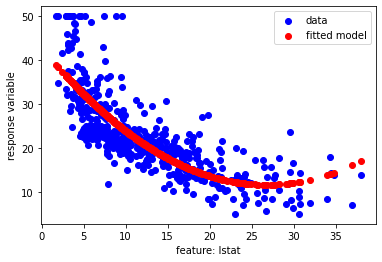

In [148]:
#let us plot it again....

plt.scatter(X, y, color='b', label='data')
plt.scatter(X, regressor.predict(X_poly), color='r', label='fitted model')

plt.xlabel('feature: lstat')
plt.ylabel('response variable')

plt.legend()
plt.show()

In [149]:
#let us calculate VIF scores:

In [150]:
_get_VIF(X_poly[:,1:])

array([12.93656618, 12.93656618])

Now we can see VIF score is even more than 10; however, we noticed an increas in R-squared value after adding X^2; 

The question is: should we trust VIF and always remove a feature with high VIF? Ok, let us drop original feature and just keep its squared version:

In [151]:
regressor = sm.OLS(y, X_poly[:,[0,2]]) #here we are skipping [:,1] as that corresponds to original feature 
regressor = regressor.fit()

print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     318.3
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.50e-55
Time:                        23:19:15   Log-Likelihood:                -1716.4
No. Observations:                 506   AIC:                             3437.
Df Residuals:                     504   BIC:                             3445.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.6474      0.430     64.308      0.0

**now, we can see that we should have kepts the original feature. So, if that is the case, how should we treat feature with high VIF value? should they be ignored? (we just saw that such consideration does not work)... ???**

**possible solution (needs further explanation)** <br>
link: [stackoverflow](https://stats.stackexchange.com/questions/23538/quadratic-term-and-variance-inflation-factor-in-ols-estimation) <br>

Collinearity only affects variance estimates of your parameters. You can avoid collinearity by data transformation. Let's do it:

In [152]:
X = df['lstat'].to_numpy()
y = df.iloc[:,-1].to_numpy()

X_scaled = StandardScaler().fit_transform(X.reshape(-1,1))
X_poly = PolynomialFeatures(degree=2).fit_transform(X_scaled)

regressor = sm.OLS(y, X_poly)
regressor = regressor.fit()

print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          1.56e-112
Time:                        23:34:55   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.3165      0.311     65.357      0.0

In [153]:
_get_VIF(X_poly[:,1:])

array([1.49212526, 1.49212526])

**NOTE:** now we can see the VIF values are low. So, we recommend to scale your data even in linear regression!Because, it makes sense to have low VIF values (Feel free to go back and review the previous questions and try to scale X first)

(11) Handling categorical feature

In [157]:
df = pd.read_csv('./datasets/Carseats.csv', index_col = 0)
df.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'CompPrice'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Advertising'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>, <AxesSubplot:>]],
      dtype=object)

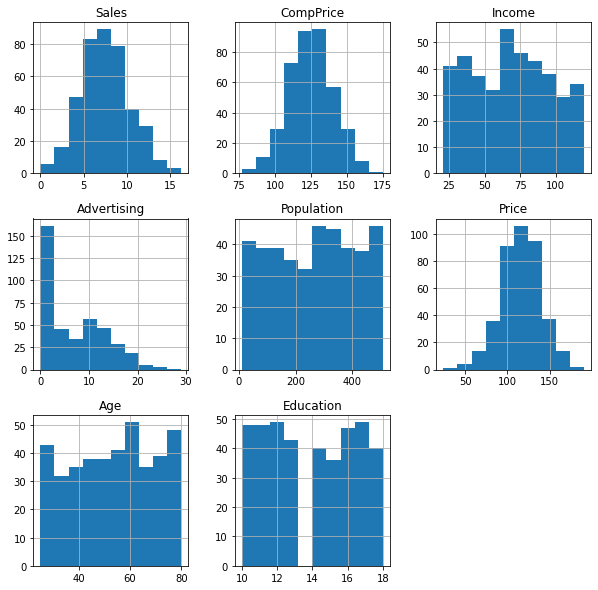

In [160]:
#let us take a quick look at distribution of features
df.hist(figsize=(10,10))

In [162]:
#how about the categorical features ShelveLoc, 'Urban',and 'US'?
cat_features = list(set(df.columns) - set(df._get_numeric_data()))
cat_features

['US', 'Urban', 'ShelveLoc']

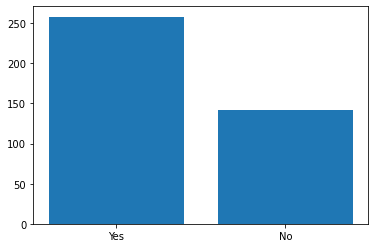

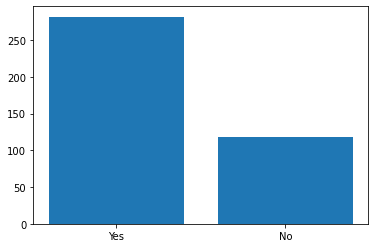

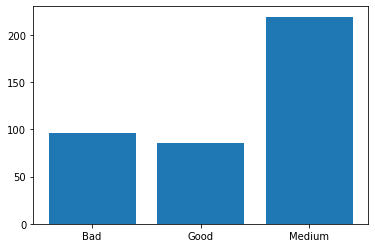

In [180]:
from collections import Counter

for feature in cat_features:
    tags_counts = Counter(df[feature])
    
    plt.bar(list(tags_counts.keys()), tags_counts.values())
    plt.show()

In [207]:
#now let us use one-hot-encoding before applying linear regression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


ct = ColumnTransformer([('ohe', OneHotEncoder(),cat_features)], remainder='passthrough')
X = ct.fit_transform(df.iloc[:,1:]) #note that the first column of df is actually the response variable
X

array([[  0.,   1.,   0., ..., 120.,  42.,  17.],
       [  0.,   1.,   0., ...,  83.,  65.,  10.],
       [  0.,   1.,   0., ...,  80.,  59.,  12.],
       ...,
       [  0.,   1.,   0., ..., 159.,  40.,  18.],
       [  0.,   1.,   0., ...,  95.,  50.,  12.],
       [  0.,   1.,   0., ..., 120.,  49.,  16.]])

In [208]:
#see the name of features in the output
ct.get_feature_names_out()

array(['ohe__US_No', 'ohe__US_Yes', 'ohe__Urban_No', 'ohe__Urban_Yes',
       'ohe__ShelveLoc_Bad', 'ohe__ShelveLoc_Good',
       'ohe__ShelveLoc_Medium', 'remainder__CompPrice',
       'remainder__Income', 'remainder__Advertising',
       'remainder__Population', 'remainder__Price', 'remainder__Age',
       'remainder__Education'], dtype=object)

In [209]:
y = df.iloc[:,0]

In [210]:
regressor = sm.OLS(y, X).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Wed, 23 Feb 2022   Prob (F-statistic):          1.60e-166
Time:                        11:32:12   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.0542      0.232     13.141      0.0

**Remarks:**<br>
we can see large p-value (i.e. > 0.05) in x5, x11 and x14.... For now, we prefer to remove only x11 and x14. Because p-value of x5 is close to threshold 0.05 (common threshold for p-value) and it is one of the categories of `ohe__ShelveLoc`. 

In [211]:
X = np.delete(X, obj=[10,13], axis=1)
regressor = sm.OLS(y, X).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     297.6
Date:                Wed, 23 Feb 2022   Prob (F-statistic):          1.20e-168
Time:                        11:32:13   Log-Likelihood:                -569.82
No. Observations:                 400   AIC:                             1160.
Df Residuals:                     390   BIC:                             1200.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.9755      0.194     15.316      0.0

In [212]:
#now we can see the p=value for x5 is not small any more. Now, let us checkout colinearity...

In [213]:
#need to be answered!!!
X_scaled = StandardScaler().fit_transform(X)
_get_VIF(X_scaled)

array([1.00000000e+06, 1.00000000e+06, 1.00000000e+06, 1.00000000e+06,
       1.00000000e+06, 1.00000000e+06, 1.00000000e+06, 1.13998701e+00,
       1.00024674e+00, 1.28703466e+00, 1.12345894e+00, 1.00033909e+00])

In [214]:
#why am I getting big VIF for dummy variables? (used to encode categorical feature) 
#because if we have other encoded tags, we can predict the remaining one!
#so, let us drop the first tag as we do encoding...

In [215]:
ct = ColumnTransformer([('ohe', OneHotEncoder(drop='first'),cat_features)], remainder='passthrough')
X = ct.fit_transform(df.iloc[:,1:]) #note that the first column of df is actually the response variable
y = df.iloc[:,0]
regressor = sm.OLS(y, X).fit()
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              1801.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):                        0.00
Time:                        11:32:16   Log-Likelihood:                         -609.87
No. Observations:                 400   AIC:                                      1242.
Df Residuals:                     389   BIC:                                      1286.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Reducing number of dummy variables by dropping one of them (e.g. in case of binary, we can just keep 1, if it is not 1, it means it is 0!!!) increased the r2_score! (please note that this appoach leads to unsymmetric dummy variables which may cause problem (??? see scikit-learn)). 

We can see that the p-value is not large anymore for the last feature. Let us check out VIF:

In [216]:
X_scaled = StandardScaler().fit_transform(X)
_get_VIF(X_scaled)

array([1.32477648, 1.00049212, 1.1292939 , 1.13174355, 1.14583405,
       1.0005818 , 1.3795381 , 1.01640417, 1.13906471, 1.00042423,
       1.00065819])

now we can see the VIF scores are low!... All good :)

## Exercises